# Machine Learning in a Nutshell with scikit-learn
    
## Projections and Manifold Learning


by 

[__Michael Granitzer__ (michael.granitzer@uni-passau.de)]( http://www.mendeley.com/profiles/michael-granitzer/)

with examples taken from the scikit-learn documentation under http://scikit-learn.org/stable/


__License__

This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)


<div class="alert alert-error">
**TODOS**
<ol>
<li> Correct heading structure for numbering
<li> Refine terminology on projections
</ol>
</div>

## Overview

**Dimensionality reduction** is the mapping of data to a lower dimensional space such that uninformative variance in the data is discarded, or such that a subspace in which the data lives is detected

**Two concepts are often applied**:

* **Geometric Projections**: Project high-dimensional data on a low dimensional surface while preserving selected properties of the data points. The projection is global, i.e. the same for all data points

    * Linear Projections
    * Non-Linear Projections
    
    
* **Manifold Learning**: Identify low-dimensional geometrical structures in high dimensional space. The projection is local, i.e. depend on the local structure of a data points.

**Two main application areas**

* Visualization of multivariate data sets or graphs
* Reducing the dimensionality of a data set for increasing the accuracy and/or the efficiency of data mining algorithms

### Examples 

The following figure shows examples for projection methods. Depending on the criteria what a *good* embedding means, different results are achieved. Top-left is the original 3D image.

<a href="http://scikit-learn.org/stable/modules/manifold.html#manifold"><img src="http://scikit-learn.org/stable/_images/plot_compare_methods_001.png"></a>

Note that every projection means loss of information, but sometimes it is good to loose information (e.g. noise)


### Dimensionality Reduction and Manifold Learning in Scikit Learn

Scikit learn supports a large number of different methods. Their usage is similar to clustering:

1. Instantiate the class for doing the transformation
2. Fit the model to the data
3. (Optionally) apply the data 

We will now look into a selected set of methods




## 1. PCA - Principal Component Analysis

PCA decomposes a data set in its "principal components" through a linear transformation. Principal components are orthogonal to each other and point in the direction of largest variance, i.e. the retain the most information of the data set.

Showing the direction of largest variance:

<img src="./images/pca-variance.svg">

Transforming the coorindation system in a new one along the principal components

<img src="./images/pca-transform.svg">



#### The PCA Transformation

Consits basically of 4 steps:

<img src="./images/pca-princip.svg">

The dimensionality reduction happens when not all principle components are used in the new coordinate system, i.e. only those PCs with the largest variance are kept.

#### PCA in scikit-learn

* Import PCA via `from sklearn.decomposition import PCA`
* Create the instance: `pca = PCA(...parameters...)
* Fit the data to create a model `model = pca.fit(data)` 
* transform data `transformed_data = model.transform(data)`

Under `model.explained_variance_ratio_` the ratio of variance explained for each principle component can be seen

In [1]:
from sklearn.decomposition import PCA
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 

#### Exercise: Visualise the IRIS data set

Load the IRIS data set and conduct a PCA retaining the two principle components with the highest variance. Plot the resulting data set and color code the classes

In [2]:
import pylab as pl
%pylab inline
from sklearn import datasets
from sklearn.decomposition import PCA
#load and prepare the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
# do the pca 
pca = PCA(n_components=2) #retain two components
model = pca.fit(X)
X_r = model.transform(X)
m = model.fit_transform(X)
print ("Explained variance ratio %s: "%(str(model.explained_variance_ratio_)))
print ("Explained variance %s: "%(str(model.explained_variance_)))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Explained variance ratio [0.92461872 0.05306648]: 
Explained variance [4.22824171 0.24267075]: 


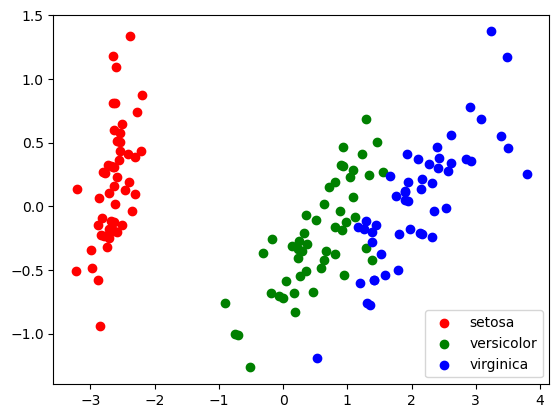

In [3]:
def scatterHelp(X,y,labels, colors):
    l=np.unique(y)
    las =[]
    plots= []
    for i in l:
        mask=y==i
        plots.append(pl.scatter(X[mask,0],X[mask,1],color=colors[i]))
        las.append(labels[i])
  
    pl.legend(plots,las)

scatterHelp(X_r,y,iris.target_names,['r','g','b'])



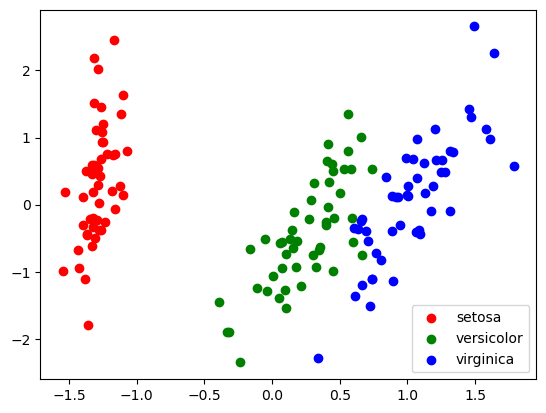

In [7]:
from sklearn.decomposition import FactorAnalysis

#load and prepare the data
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# target_names = iris.target_names

# do the transformation
# pca = PCA(n_components=2) #retain two components
transformer = FactorAnalysis(n_components=3, random_state=0)
X_new = transformer.fit_transform(X)

# plot
scatterHelp(X_new, y, iris.target_names, ['r', 'g', 'b'])

#### Exercise 2: Apply the PCA to digits data set

Load the digits data set and project the data onto a 2D space. Does it seem that classes are separable?





In [8]:
import numpy as np
import pylab as pl
from matplotlib import offsetbox

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape


Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

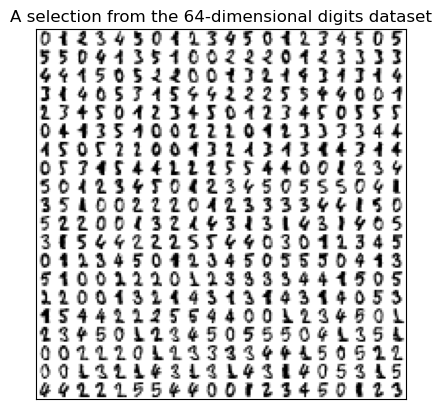

In [9]:
#plot some of the data sets
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

pl.imshow(img, cmap=pl.cm.binary)
pl.xticks([])
pl.yticks([])
pl.title('A selection from the 64-dimensional digits dataset')


Computing PCA projection


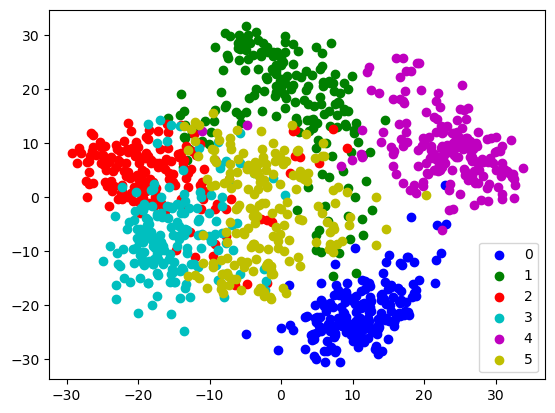

In [10]:
from time import time
print("Computing PCA projection")
t0 = time()
pca = PCA(n_components=2) #retain two components
model = pca.fit(X)
X_pca = model.transform(X)
scatterHelp(X_pca,y,["0","1","2","3","4","5","6","7","8","9"],["b","g","r","c","m","y","k","aqua",0.4,0.7] )


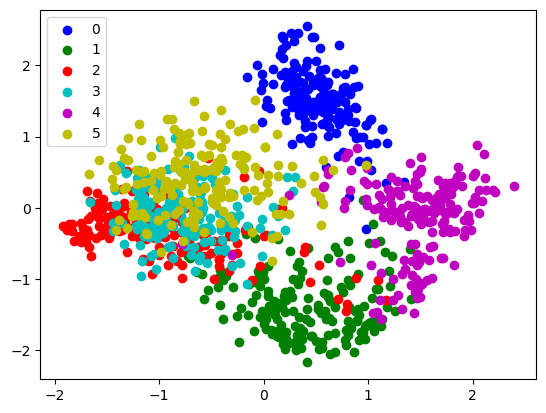

In [18]:
transformer = FactorAnalysis(n_components=2, random_state=0)
X_new = transformer.fit_transform(X)
scatterHelp(X_new,y,["0","1","2","3","4","5","6","7","8","9"],["b","g","r","c","m","y","k","aqua",0.4,0.7] )